In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 0) Data Load

In [2]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [3]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [4]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [5]:
train_df = train_df1.copy()

train_17 = pd.read_csv('train_2017.csv',parse_dates=['transactiondate'])

prop_17 = pd.read_csv('properties_2017.csv')

train_df2 = pd.merge(train_17,prop_17,on='parcelid', how ='left')

train_df = pd.concat([train_df1,train_df2])

train_df.head()

# 1) Analysis Outer-Feature

## 1.1) Overview the Outer-feature data

- 'airconditioningtypeid'
- 'architecturalstyletypeid'
- 'buildingqualitytypeid'
- 'buildingclasstypeid'
- 'decktypeid'
- 'numberofstories'
- 'storytypeid'
- 'typeconstructiontypeid'
- 'unitcnt'
- 'yardbuildingsqft17'
- 'yardbuildingsqft26'
- 'yearbuilt'

outer feature는 총 12개의 컬럼으로 이뤄져 있고, 분류 기준은 집의 전체적인 구조(structure)적인 부분에서 관찰될 수 있는 특징에 관한 것입니다.

In [32]:
outer_feature=['에이컨 아이디',
'건축 양식 아이디',
'건물 상태에 대한 평가 (최고부터 최악까지 평가가 매겨져 있다.)',
'건물 뼈대에 어떤 타입의 재료가 쓰였는지',
'집 마당 부근에 있는 갑판(테라스같은 것을 의미)',
'집의 층 수 (story or level이라고 표현한다.)',
'집의 층 수 (story or level이라고 표현한다.)',
'주택 건설에 사용 된 건축 자재의 유형',
'구조가 구축 된 단위 수 (예 : 2 = 이중, 3 = 삼중 등)',
'마당 안뜰',
'저장고 / 야적장',
'주거지가 지어진 해']
len(outer_feature)

12

In [33]:
outer_feature_col = ['airconditioningtypeid',
'architecturalstyletypeid',
'buildingqualitytypeid',
'buildingclasstypeid',
'decktypeid',
'numberofstories',
'storytypeid',
'typeconstructiontypeid',
'unitcnt',
'yardbuildingsqft17',
'yardbuildingsqft26',
'yearbuilt']
len(outer_feature_col)

12

In [10]:
outer_df = pd.DataFrame(columns=['name','feature'])
outer_df.name = outer_feature_col
outer_df.feature = outer_feature
outer_df

,name,feature
0,airconditioningtypeid,에이컨 아이디
1,architecturalstyletypeid,건축 양식 아이디
2,buildingqualitytypeid,건물 상태에 대한 평가 (최고부터 최악까지 평가가 매겨져 있다.)
3,buildingclasstypeid,건물 뼈대에 어떤 타입의 재료가 쓰였는지
4,decktypeid,집 마당 부근에 있는 갑판(테라스같은 것을 의미)
5,numberofstories,집의 층 수 (story or level이라고 표현한다.)
6,storytypeid,집의 층 수 (story or level이라고 표현한다.)
7,typeconstructiontypeid,주택 건설에 사용 된 건축 자재의 유형
8,unitcnt,"구조가 구축 된 단위 수 (예 : 2 = 이중, 3 = 삼중 등)"
9,yardbuildingsqft17,마당 안뜰


## 1.2) Datatype of Columns

In [14]:
print(train_df[outer_feature_col].dtypes,end='\n\n'),
print('Number of outer_feature_col:  {}'.format(len(outer_feature_col)))

airconditioningtypeid       float64
architecturalstyletypeid    float64
buildingqualitytypeid       float64
buildingclasstypeid         float64
decktypeid                  float64
numberofstories             float64
storytypeid                 float64
typeconstructiontypeid      float64
unitcnt                     float64
yardbuildingsqft17          float64
yardbuildingsqft26          float64
yearbuilt                   float64
dtype: object

Number of outer_feature_col:  12


outer-feature의 자료형은 모두 float형입니다.

## 1.3) Individual columns' feature analysis

### scatter plot about numerical data

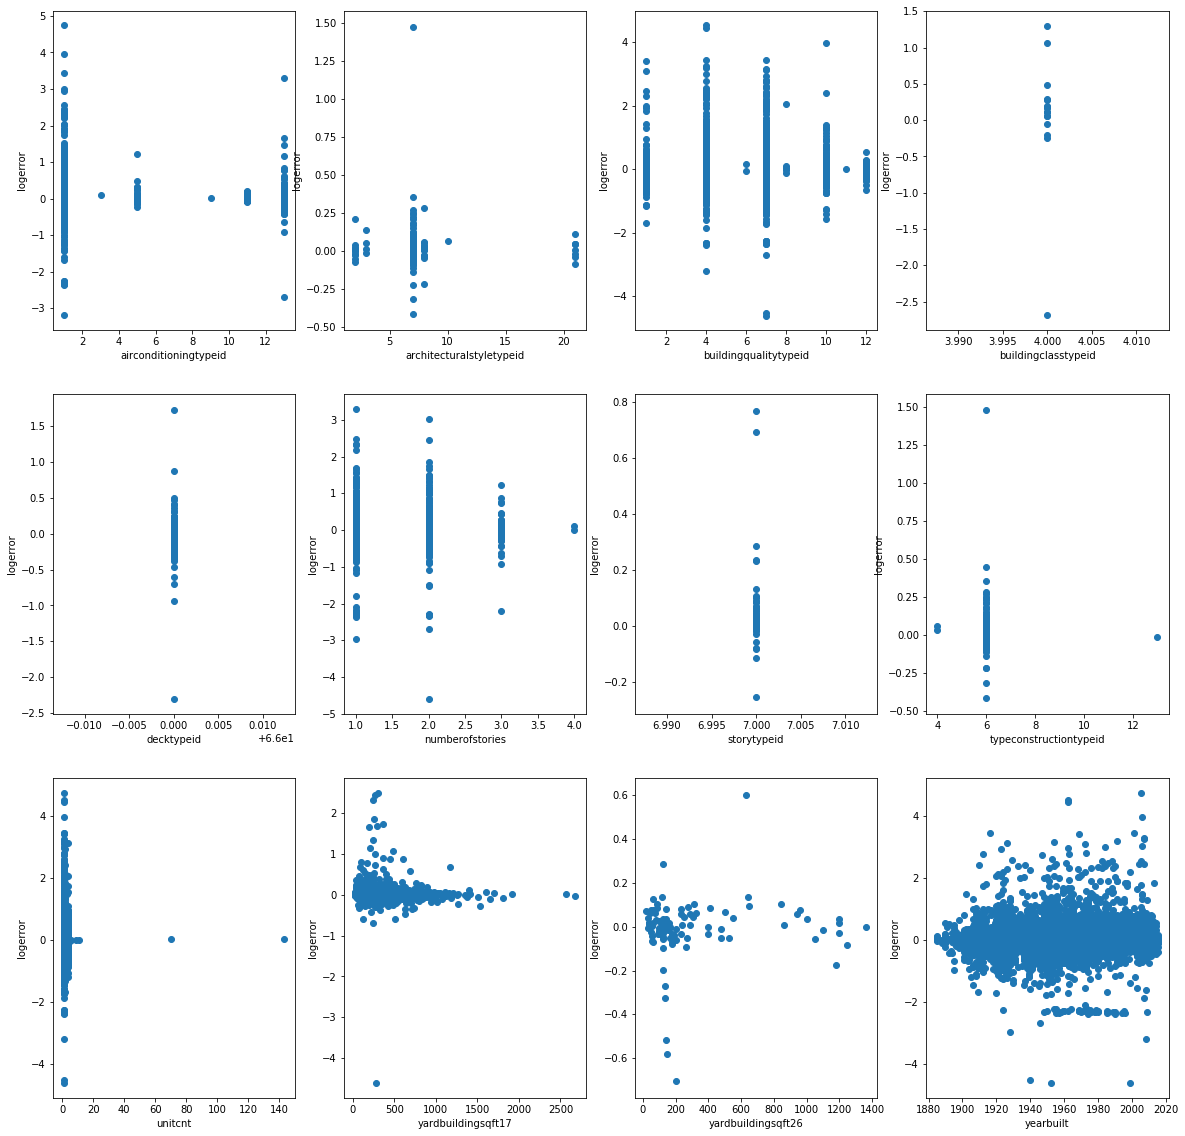

In [16]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(outer_feature_col):
    plt.subplot(3,4,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- 자료형은 numerical data로 나왔지만 scatter plot으로 봤을 때, 분포도가 continuous 하지 않고 discrete한 데이터라는 것을 알 수 있다.
- discrete data는 float형으로 이뤄진 category를 가지고 있다고 할 수 있고, 이는 후에 나올 data cleaning에도 유의하게 보아야 할 정보다.
- 이러한 자료들을 value_counts 명령어로 확인해보겠다. discrete 한지 안한지에 대해서 기준을 두는데, 그 기준은 category가 20개를 넘지 않는 것으로 하겠다.
- 위의 조건을 만족하는 컬럼을 discrete_outer_col이라는 리스트에 넣고 이 컬럼들을 시각화해보겠다.

In [1]:
discrete_outer_col = []
for idx,col in enumerate(outer_feature_col):
    if len(train_df[col].value_counts())<40:
        print(train_df[col].value_counts())
        discrete_outer_col.append(col)
len(discrete_outer_col)

NameError: name 'outer_feature_col' is not defined

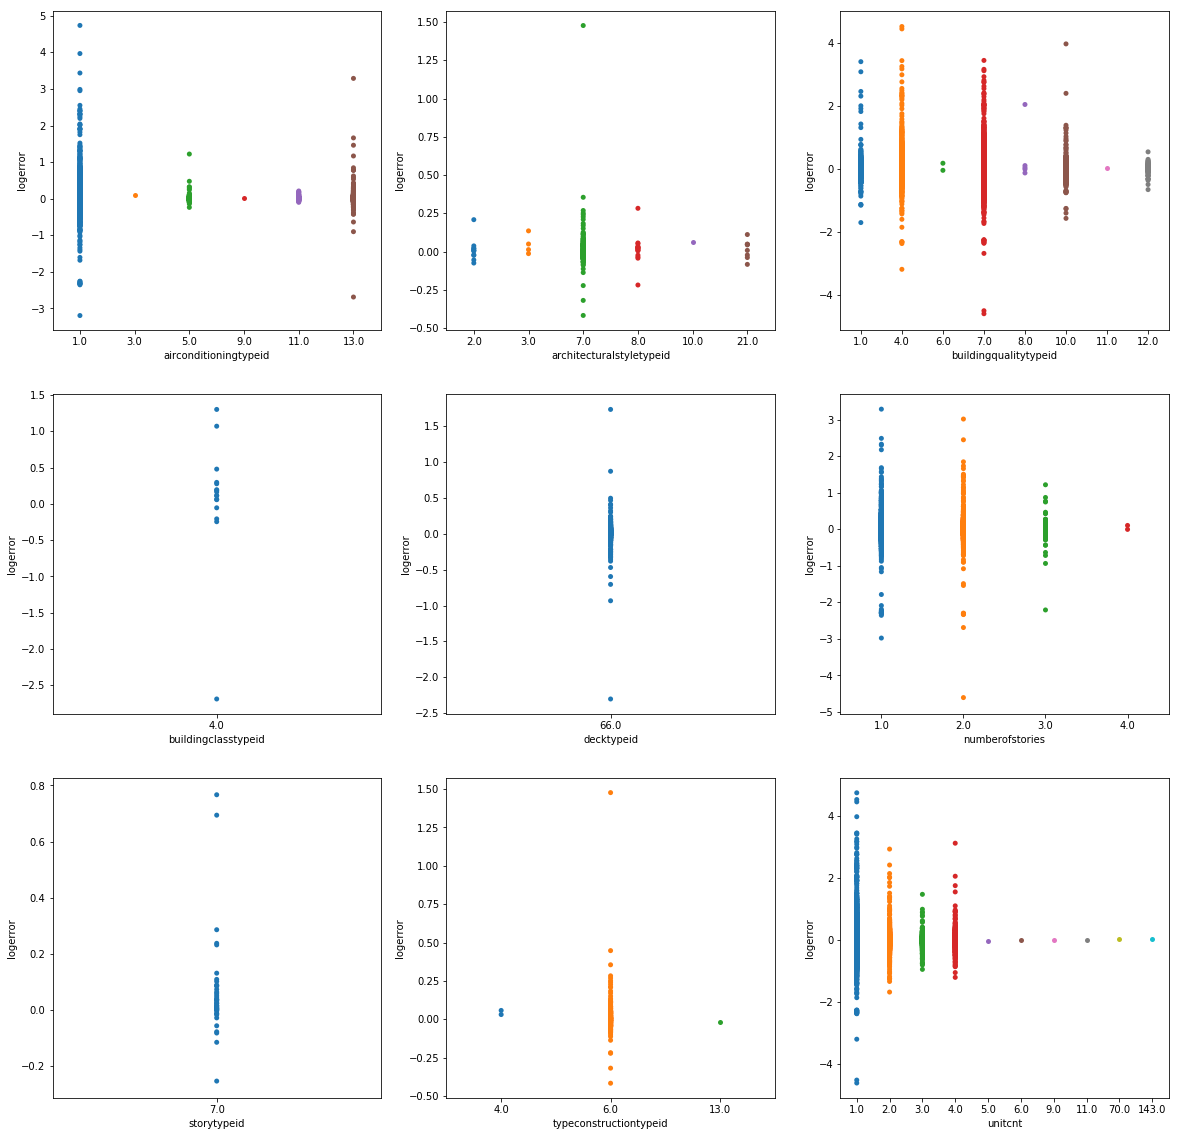

In [29]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_outer_col):
    plt.subplot(3,3,idx+1)
    sns.stripplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

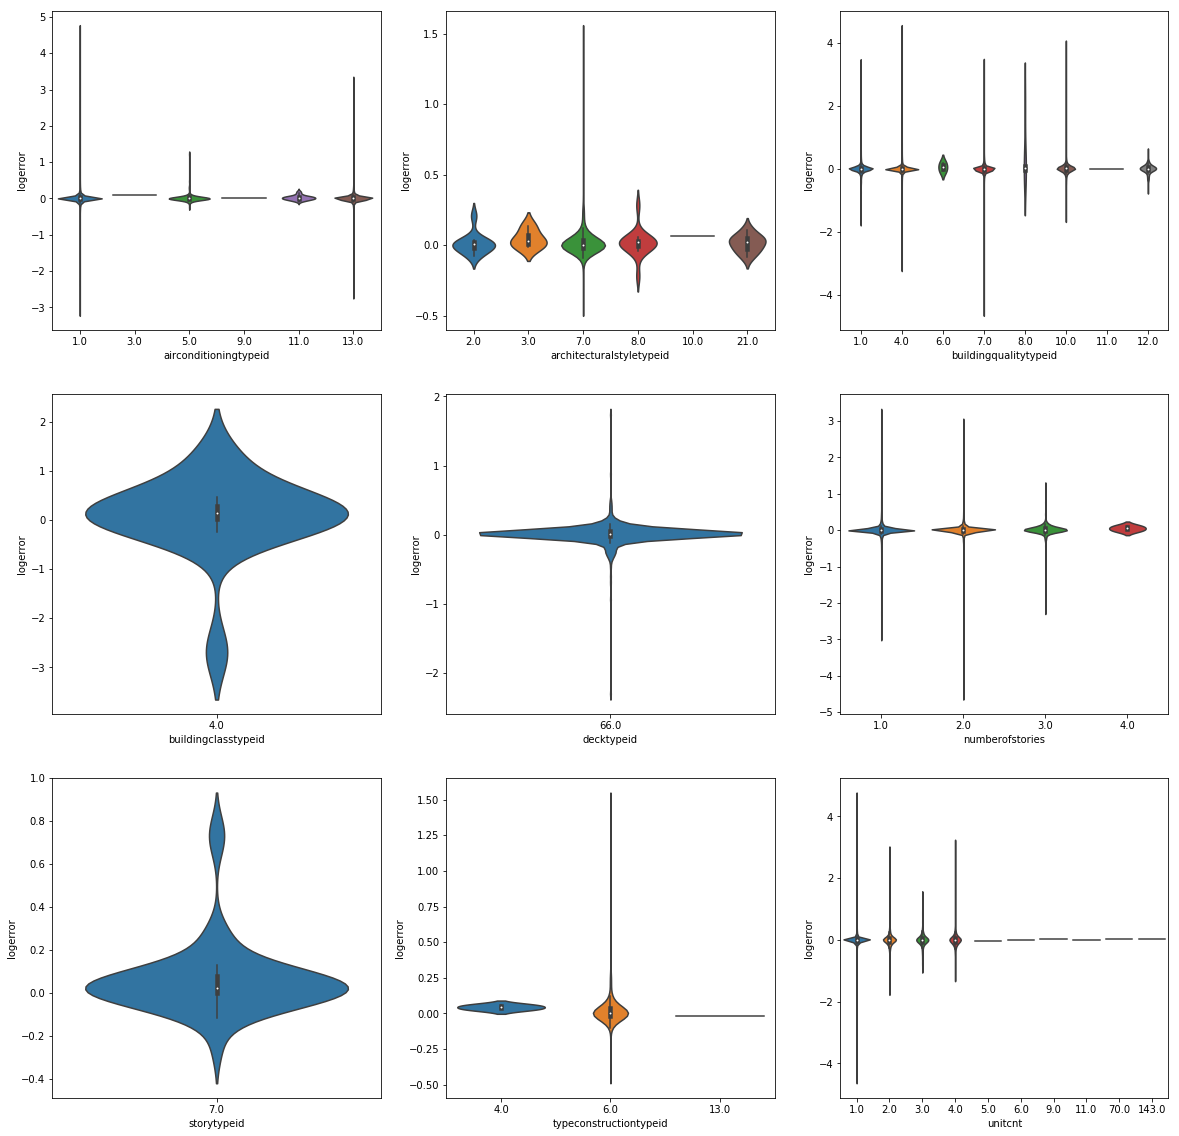

In [28]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_outer_col):
    plt.subplot(3,3,idx+1)
    sns.violinplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- discrete data 에 대해서 plot을 그려보니, 카테고리 자체가 1개인 컬럼이 존재한다는 것과 multiple(2개 이상)한 카테고리를 가지고 있지만, 그 분포가 치우쳐져있는 컬럼이 있다는 것을 파악할 수 있다.
- 이와 같은 특성은 곧 실시한 data cleaning에서 감안해야 할 부분이다.

# 2) Analysis Missing value 

우선 outer-feature 내의 컬럼들로 구성된 데이터 프레임 'outer_df'를 생성해보겠습니다.

In [58]:
outer_df = train_df[outer_feature_col]
outer_df.tail()

,airconditioningtypeid,architecturalstyletypeid,buildingqualitytypeid,buildingclasstypeid,decktypeid,numberofstories,storytypeid,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt
90270,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1979.0
90271,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1965.0
90272,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1924.0
90273,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1981.0
90274,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1947.0


In [62]:
missing_outer_df = outer_df.isnull().sum().reset_index()
missing_outer_df.columns = ['col','missing_cnt']
missing_outer_df['missing_ratio'] = missing_outer_df.missing_cnt / len(outer_df)
missing_outer_df

,col,missing_cnt,missing_ratio
0,airconditioningtypeid,61494,0.681185
1,architecturalstyletypeid,90014,0.997109
2,buildingqualitytypeid,32911,0.364564
3,buildingclasstypeid,90259,0.999823
4,decktypeid,89617,0.992711
5,numberofstories,69705,0.772141
6,storytypeid,90232,0.999524
7,typeconstructiontypeid,89976,0.996688
8,unitcnt,31922,0.353608
9,yardbuildingsqft17,87629,0.970690


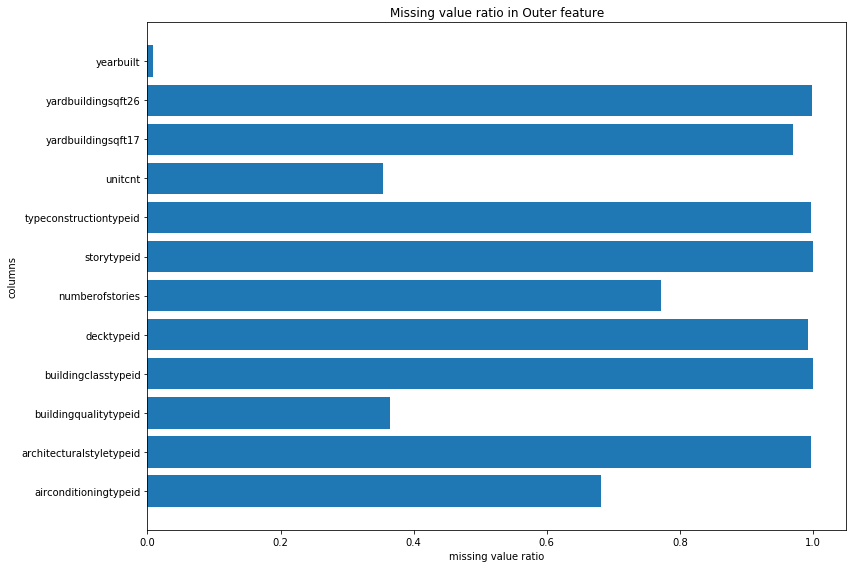

In [65]:
plt.figure(figsize=(12,8))
plt.barh(missing_outer_df.col,missing_outer_df.missing_ratio)
plt.title('Missing value ratio in Outer feature')
plt.xlabel('missing value ratio')
plt.ylabel('columns')
plt.tight_layout()
plt.show()